In [111]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json
from io import StringIO
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
# File to Load (Remember to Change These)
school_data = "INSchoolDataCopy.csv"
test_score_data = "SchoolCorpDataRefined.csv"
income_data = "IncomeUpdateRefined.csv"
zip_city_codes = 'ZipCityCodes.csv'
zip_updated = 'zip_city_updated.csv'
sample_money = 'sampleMoney.csv'
# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data)
test_score_data = pd.read_csv(test_score_data)
income_data = pd.read_csv(income_data)
zip_city_codes = pd.read_csv(zip_city_codes)
zip_updated = pd.read_csv(zip_updated)
sample_money = pd.read_csv(sample_money)
# Combine the data into a single dataset


In [112]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 2000
    display.max_rows = 2000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [113]:
sample_money.dtypes



ZIP                              float64
Size of adjusted gross income     object
number of returns                 object
single returns                    object
joint returns                     object
Adjusted gross income             object
dtype: object

In [114]:
sample_money['Adjusted gross income'] = pd.to_numeric(sample_money['Adjusted gross income'], errors='coerce')

In [115]:
sample_money['single returns'] = pd.to_numeric(sample_money['single returns'], errors='coerce')

In [116]:
sample_money['joint returns'] = pd.to_numeric(sample_money['joint returns'], errors='coerce')

In [117]:
sample_money['number of returns'] = pd.to_numeric(sample_money['number of returns'], errors='coerce')

In [118]:
sample_money['ZIP'] = pd.to_numeric(sample_money['ZIP'], errors='coerce')

In [119]:
school_complete = pd.merge(school_data, test_score_data, how="left", on=["ID", "ID"])

In [120]:
school_complete


,ID,District Name,Mailing Address,City,State,ZIP,Overall Points,Overall Grade
0,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN
1,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B
2,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,46001,73.2,C
3,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,46011,72.4,C
4,9790.0,ANDERSON PREPARATORY ACADEMY,3205 W 25TH ST,ANDERSON,IN,46011,NaN,NaN
5,9715.0,ANDREW ACADEMY,4050 E 38TH ST,INDIANAPOLIS,IN,46218,NaN,NaN
6,9615.0,ANDREW J BROWN ACADEMY,3600 N GERMAN CHURCH RD,INDIANAPOLIS,IN,46235,NaN,NaN
7,6700.0,AREA 30 CAREER CENTER EDU INTER,1 N CALBERT WAY SUITE A,GREENCASTLE,IN,46135,NaN,NaN
8,5470.0,ARGOS COMMUNITY SCHOOLS,410 N FIRST ST,ARGOS,IN,46501,80.4,B
9,9685.0,ASPIRE CHARTER ACADEMY,4900 W 15TH AVE,GARY,IN,46406,NaN,NaN


In [121]:
zip_sample = pd.pivot_table(sample_money, values=[ 'Adjusted gross income'],  index=['ZIP'],
                      aggfunc={ 'Adjusted gross income': np.median})
                                
                               
zip_sample  

,Adjusted gross income
ZIP,
0.0,27616132.5
46001.0,43256.0
46011.0,72958.5
46012.0,72021.5
46013.0,62791.5
46016.0,30988.0
46017.0,25946.0
46030.0,13281.5
46031.0,9516.0


In [122]:
school_complete = pd.merge(sample_money, school_complete, how="left", on=["ZIP", "ZIP"])



In [123]:
school_complete.dropna()

,ZIP,Size of adjusted gross income,number of returns,single returns,joint returns,Adjusted gross income,ID,District Name,Mailing Address,City,State,Overall Points,Overall Grade
11,46001.0,"$1 under $25,000",1910.0,1260.0,340.0,23258.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
12,46001.0,"$25,000 under $50,000",1280.0,560.0,460.0,46583.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
13,46001.0,"$50,000 under $75,000",760.0,220.0,440.0,46723.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
14,46001.0,"$75,000 under $100,000",460.0,70.0,370.0,39929.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
15,46001.0,"$100,000 under $200,000",460.0,20.0,430.0,57726.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
21,46011.0,"$1 under $25,000",2960.0,2040.0,410.0,36836.0,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,72.4,C
23,46011.0,"$1 under $25,000",2960.0,2040.0,410.0,36836.0,5245.0,FRANKTON-LAPEL COMMUNITY SCHS,7916 W 300 N,ANDERSON,IN,82.7,B
24,46011.0,"$25,000 under $50,000",2070.0,1000.0,600.0,75263.0,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,72.4,C
26,46011.0,"$25,000 under $50,000",2070.0,1000.0,600.0,75263.0,5245.0,FRANKTON-LAPEL COMMUNITY SCHS,7916 W 300 N,ANDERSON,IN,82.7,B
27,46011.0,"$50,000 under $75,000",1220.0,400.0,660.0,74992.0,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,72.4,C


In [124]:
school_comparison = pd.pivot_table(school_complete, values=[ 'Adjusted gross income'],
                                                         index=['City', 'Overall Points', 'Overall Grade', 'District Name', 'ID'],
                      aggfunc={ 'Adjusted gross income': [np.median, np.sum]})
                               
                                
school_comparison

Adjusted gross income  \
                                                                                                      median   
City            Overall Points Overall Grade District Name                      ID                             
AKRON           83.6           B             TIPPECANOE VALLEY SCHOOL CORP      4445.0               15218.0   
ALBION          76.3           C             CENTRAL NOBLE COM SCHOOL CORP      6055.0               34355.5   
ALEXANDRIA      73.2           C             ALEXANDRIA COM SCHOOL CORP         5265.0               43256.0   
ANDERSON        72.4           C             ANDERSON COMMUNITY SCHOOL CORP     5275.0               72958.5   
                82.7           B             FRANKTON-LAPEL COMMUNITY SCHS      5245.0               72958.5   
ANGOLA          84.7           B             M S D STEUBEN COUNTY               7615.0               75642.0   
ARCADIA         86.0           B             HAMILTON HEIGHTS SCHOOL CORP       3025.0               13281.5   
ARGOS           80.4           B             ARGOS COMMUNITY SCHOOLS            5470.0               16112.0   
ATTICA          79.4           C             ATTICA CONSOLIDATED SCH CORP       2435.0               25679.0   
AURORA          79.1           C             SOUTH DEARBORN COM SCHOOL CORP     1600.0               44711.5   
AUSTIN          77.4           C             SCOTT COUNTY SCHOOL DISTRICT 1     7230.0               24722.0   
AVON            88.4           B             AVON COMMUNITY SCHOOL CORP         3315.0              175664.5   
BAINBRIDGE      88.9           B             NORTH PUTNAM COMMUNITY SCHOOLS     6715.0                8487.0   
BATESVILLE      90.8           A             BATESVILLE COMMUNITY SCH CORP      6895.0               53816.5   
BEDFORD         80.0           B             NORTH LAWRENCE COM SCHOOLS         5075.0              111716.5   
BEECH GROVE     72.4           C             BEECH GROVE CITY SCHOOLS           5380.0               44959.0   
BERNE           90.3           A             SOUTH ADAMS SCHOOLS                35.0                 29869.5   
BICKNELL        80.6           B             NORTH KNOX SCHOOL CORP             4315.0               13560.0   
BLOOMFIELD      87.2           B             BLOOMFIELD SCHOOL DISTRICT         2920.0               37922.0   
                87.7           B             EASTERN GREENE SCHOOLS             2940.0               37922.0   
BLOOMINGTON     90.6           A             MONROE COUNTY COM SCH CORP         5740.0              131027.0   
BLUFFTON        89.5           B             M S D BLUFFTON-HARRISON            8445.0               63744.0   
BOURBON         96.4           A             TRITON SCHOOL CORPORATION          5495.0               16352.5   
BRAZIL          87.1           B             CLAY COMMUNITY SCHOOLS             1125.0               76513.5   
BREMEN          87.3           B             BREMEN PUBLIC SCHOOLS              5480.0               50282.5   
BROOKVILLE      83.6           B             FRANKLIN COUNTY COM SCH CORP       2475.0               45284.0   
BROWNSBURG      99.0           A             BROWNSBURG COMMUNITY SCH CORP      3305.0              178028.5   
BROWNSTOWN      83.8           B             BROWNSTOWN CNT COM SCH CORP        3695.0               22442.0   
BUNKER HILL     80.9           B             MACONAQUAH SCHOOL CORP             5615.0                7663.0   
BUTLER          90.4           A             DEKALB CO EASTERN COM SCH DIST     1805.0               21663.0   
CAMPBELLSBURG   79.7           C             WEST WASHINGTON SCHOOL CORP        8220.0                7923.0   
CANNELTON       59.3           F             CANNELTON CITY SCHOOLS             6340.0               11725.0   
CARMEL          98.3           A             CARMEL CLAY SCHOOLS                3060.0              120463.0   
CAYUGA          77.5           C             NORTH VERM

In [125]:
#Narrowed data to test scores in each zip with adjusted income
test_score_table = pd.pivot_table(school_complete, values=['Overall Points','Adjusted gross income'], index=['City','State','ZIP','District Name','Overall Grade'])  
test_score_table = test_score_table.reset_index()
test_score_table

,City,State,ZIP,District Name,Overall Grade,Adjusted gross income,Overall Points
0,AKRON,IN,46910.0,TIPPECANOE VALLEY SCHOOL CORP,B,14869.400000,83.6
1,ALBION,IN,46701.0,CENTRAL NOBLE COM SCHOOL CORP,C,32280.000000,76.3
2,ALEXANDRIA,IN,46001.0,ALEXANDRIA COM SCHOOL CORP,C,38716.833333,73.2
3,ANDERSON,IN,46011.0,ANDERSON COMMUNITY SCHOOL CORP,C,75650.166667,72.4
4,ANDERSON,IN,46011.0,FRANKTON-LAPEL COMMUNITY SCHS,B,75650.166667,82.7
5,ANGOLA,IN,46703.0,M S D STEUBEN COUNTY,B,81631.333333,84.7
6,ARCADIA,IN,46030.0,HAMILTON HEIGHTS SCHOOL CORP,B,15056.000000,86.0
7,ARGOS,IN,46501.0,ARGOS COMMUNITY SCHOOLS,B,15138.600000,80.4
8,ATTICA,IN,47918.0,ATTICA CONSOLIDATED SCH CORP,C,22835.166667,79.4
9,AURORA,IN,47001.0,SOUTH DEARBORN COM SCHOOL CORP,C,43981.166667,79.1


In [128]:
#Correlation between Adjusted Gross Income and Overall Points
data_correlation = test_score_table.iloc[:,0]
overall_points = test_score_table.iloc[:,6]
correlation = st.pearsonr(zip_code,overall_points)
print(f"The correlation between both factors is {round(correlation[0],2)}")
data_correlation

The correlation between both factors is 0.08


0                AKRON
1               ALBION
2           ALEXANDRIA
3             ANDERSON
4             ANDERSON
5               ANGOLA
6              ARCADIA
7                ARGOS
8               ATTICA
9               AURORA
10              AUSTIN
11                AVON
12          BAINBRIDGE
13          BATESVILLE
14             BEDFORD
15         BEECH GROVE
16               BERNE
17            BICKNELL
18          BLOOMFIELD
19          BLOOMFIELD
20         BLOOMINGTON
21            BLUFFTON
22             BOURBON
23              BRAZIL
24              BREMEN
25          BROOKVILLE
26          BROWNSBURG
27          BROWNSTOWN
28         BUNKER HILL
29              BUTLER
30       CAMPBELLSBURG
31           CANNELTON
32              CARMEL
33              CAYUGA
34          CEDAR LAKE
35         CENTERVILLE
36            CHALMERS
37     CHARLOTTESVILLE
38          CHESTERTON
39          CHURUBUSCO
40         CLARKSVILLE
41             CLAYTON
42             CLINTON
43         

The correlation between both factors is 0.08


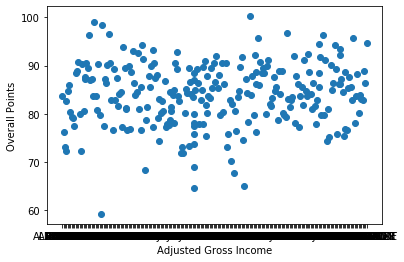

In [92]:
#Scatter Plot showing correlation b/t Adjusted Gross Income and Overall Points
plt.scatter(data_correlation,overall_points)
plt.xlabel('Adjusted Gross Income')
plt.ylabel('Overall Points')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [63]:
#All school with test scores equal to or over 76
over_seventy_six = test_score_table.loc[test_score_table["Overall Points"] >=76, [
    "Overall Points",'Adjusted gross income',"City", "State", "ZIP", "District Name"]]
over_seventy_six

,Overall Points,Adjusted gross income,City,State,ZIP,District Name
0,83.6,14869.400000,AKRON,IN,46910.0,TIPPECANOE VALLEY SCHOOL CORP
1,76.3,32280.000000,ALBION,IN,46701.0,CENTRAL NOBLE COM SCHOOL CORP
4,82.7,75650.166667,ANDERSON,IN,46011.0,FRANKTON-LAPEL COMMUNITY SCHS
5,84.7,81631.333333,ANGOLA,IN,46703.0,M S D STEUBEN COUNTY
6,86.0,15056.000000,ARCADIA,IN,46030.0,HAMILTON HEIGHTS SCHOOL CORP
7,80.4,15138.600000,ARGOS,IN,46501.0,ARGOS COMMUNITY SCHOOLS
8,79.4,22835.166667,ATTICA,IN,47918.0,ATTICA CONSOLIDATED SCH CORP
9,79.1,43981.166667,AURORA,IN,47001.0,SOUTH DEARBORN COM SCHOOL CORP
10,77.4,22139.400000,AUSTIN,IN,47102.0,SCOTT COUNTY SCHOOL DISTRICT 1
11,88.4,233985.833333,AVON,IN,46123.0,AVON COMMUNITY SCHOOL CORP


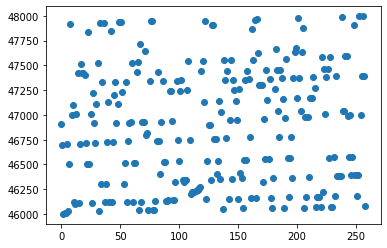

In [95]:
#Graph over 76
#Scatter Plot
zip_code = test_score_table.index
zip_code
test_scores = test_score_table['ZIP']
plt.scatter(zip_code,test_scores)

In [66]:
#All school with test scores under 76
under_seventy_six = test_score_table.loc[test_score_table["Overall Points"] < 76, [
    "Overall Points",'Adjusted gross income',"City", "State", "ZIP", "District Name"]]
under_seventy_six

,Overall Points,Adjusted gross income,City,State,ZIP,District Name
2,73.2,38716.833333,ALEXANDRIA,IN,46001.0,ALEXANDRIA COM SCHOOL CORP
3,72.4,75650.166667,ANDERSON,IN,46011.0,ANDERSON COMMUNITY SCHOOL CORP
15,72.4,44824.833333,BEECH GROVE,IN,46107.0,BEECH GROVE CITY SCHOOLS
31,59.3,12441.600000,CANNELTON,IN,47520.0,CANNELTON CITY SCHOOLS
66,68.3,36774.666667,ELWOOD,IN,46036.0,ELWOOD COMMUNITY SCHOOL CORP
79,74.4,82692.166667,FRANKFORT,IN,46041.0,COMMUNITY SCHOOLS OF FRANKFORT
99,72.0,16553.166667,HAMILTON,IN,46742.0,HAMILTON COMMUNITY SCHOOLS
100,73.2,7407.600000,HAMLET,IN,46532.0,OREGON-DAVIS SCHOOL CORP
101,71.8,19071.000000,HANOVER,IN,47243.0,SOUTHWESTERN-JEFFERSON CO CON
105,73.3,135653.500000,HOBART,IN,46342.0,RIVER FOREST COMMUNITY SCH CORP


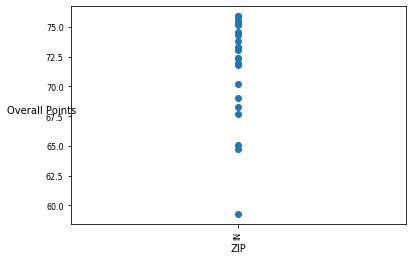

In [93]:
#Graph test scores under 76
plt.scatter(under_seventy_six.iloc[:,3],under_seventy_six.iloc[:,0])
plt.xlabel('ZIP')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylabel('Overall Points', rotation=360)
plt.show()

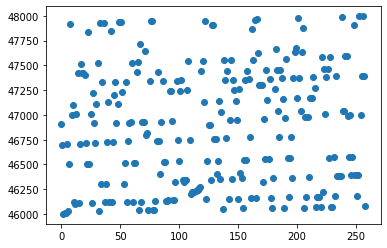

In [74]:
#Graph under 76
#Scatter Plot
zip_code = test_score_table.index
zip_code
test_scores = test_score_table['ZIP']
plt.scatter(zip_code,test_scores)

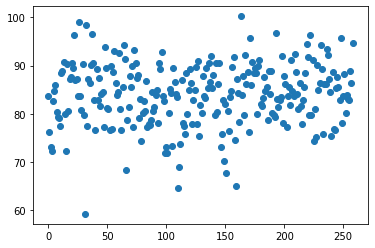

In [68]:
#Scatter Plot
zip_code = test_score_table.index
zip_code
test_scores = test_score_table['Overall Points']
plt.scatter(zip_code,test_scores)

In [72]:
#Lowest and Highest Overall Score
lowest_score = test_score_table["Overall Points"].min()
lowest_score
highest_score = test_score_table["Overall Points"].max()
highest_score

summary_table = pd.DataFrame({"Highest Test Score": [highest_score],
                              "Lowest Test Score": [lowest_score]})
summary_table

,Highest Test Score,Lowest Test Score
0,100.2,59.3
